In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7,4]
import seaborn as sns
sns.set()
from scipy.stats import median_absolute_deviation as mad

In [3]:
map_data = np.load('../../../outputs/tile_maps/S07XX_rf1XX_healpix_map.npz', allow_pickle=True)
map_data = {key:map_data[key].item() for key in map_data}
tile_maps = map_data['healpix_maps']
sat_maps = map_data['sat_map']
times = map_data['times']
tile_map = tile_maps['0']
sat_map = sat_maps['0']
times = times['0']

In [4]:
tile_map_median = [(np.median(i) if i != [] else np.nan ) for i in tile_map]
tile_map_scaled = np.asarray([(np.asarray(i) - np.nanmax(tile_map_median[:4000])) for i in tile_map])

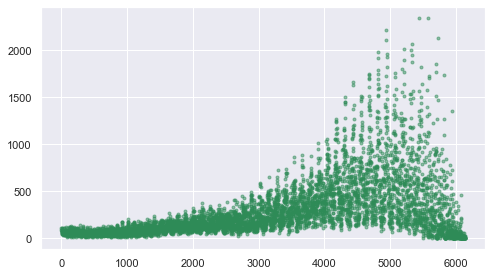

In [7]:
map_counts = [len(i) for i in tile_map_scaled]
plt.scatter(range(6144), map_counts[:6144], marker='.', color='seagreen', alpha=0.5)
plt.tight_layout()
plt.show()
plt.close()

In [8]:
def plt_pix_data(pix):
    pix_data = tile_map_scaled[pix]
    pix_sat_data = sat_map[pix]
    pix_time_data = times[pix]
    sns.distplot(pix_data, bins=20, color='seagreen').set_title(f'Power Distribution in Pixel: {pix}')
    print(f'Number of passes in pixel {pix}: {len(pix_data)}, Median: {np.median(pix_data)}, MAD: {mad(pix_data)}')
    plt.tight_layout()
    plt.show()
    plt.close()
    
    values, counts = np.unique(pix_sat_data, return_counts=True)
    sns.set()
    index = np.arange(len(values))
    plt.bar(index, counts, color=sns.color_palette('Spectral', len(counts)))
    plt.xticks(index, values, rotation=90)
    plt.title(f'Satellites in Healpix pixel: {pix}')
    plt.tight_layout()
    plt.show()
    plt.close()
    
    sat_data = {v:np.asarray(pix_data)[np.where(np.asarray(pix_sat_data) == v)] for v in values}
    time_data = {v:np.asarray(pix_time_data)[np.where(np.asarray(pix_sat_data) == v)] for v in values}
    data_41187 = sat_data[41187]
    time_41187 = time_data[41187]
    
    sns.distplot(data_41187, bins=20, color='seagreen').set_title(f'Satellite 41187 Power Distribution in Pixel: {pix}')
    plt.tight_layout()
    plt.show()
    plt.close()
    
    plt.scatter(time_41187, data_41187, marker='.', color='seagreen', alpha=0.5)
    plt.title(f'Gain test: Power in pixel {pix} by sat 41187')
    plt.tight_layout()
    plt.show()
    plt.close()

Number of passes in pixel 1111: 154, Median: -10.253326416015625, MAD: 3.1342677761077877


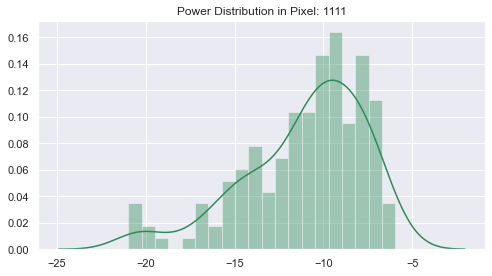

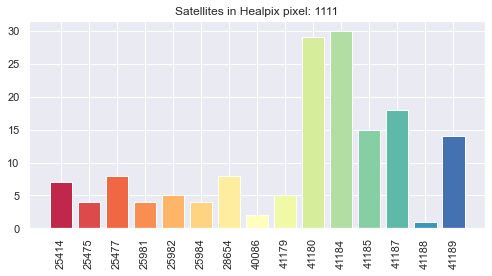

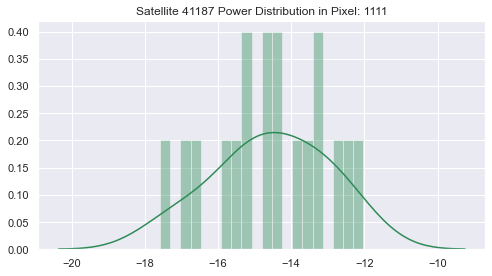

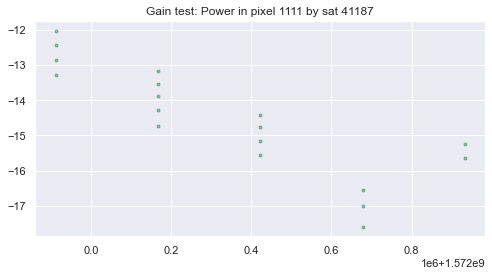

In [9]:
plt_pix_data(1111)

In [10]:
pix_list = np.where(np.asarray(map_counts) > 2000)
pix_list_counts = [len(tile_map_scaled[i]) for i in pix_list[0]]

Number of passes in pixel 4945: 2218, Median: -16.856441497802734, MAD: 1.9693891868591307


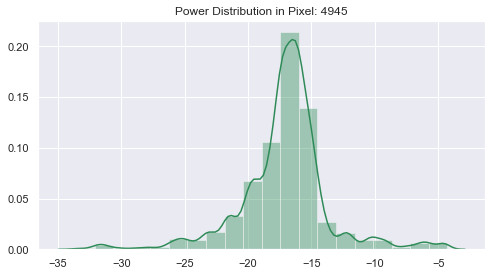

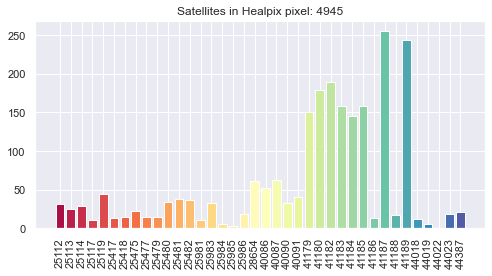

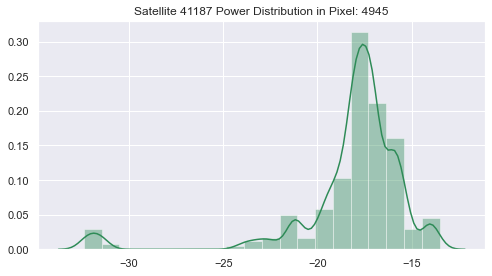

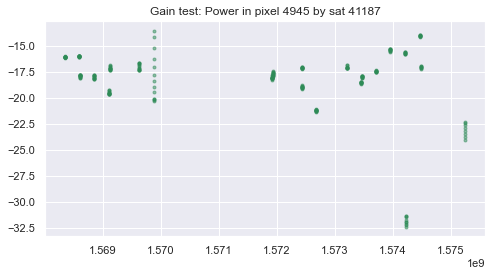

Number of passes in pixel 4946: 2108, Median: -16.5883731842041, MAD: 1.7695206310272216


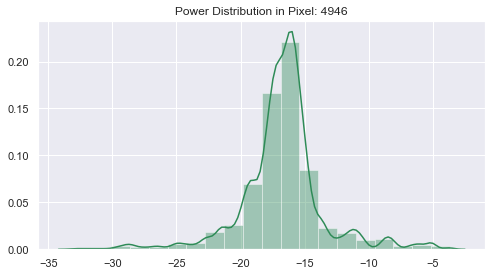

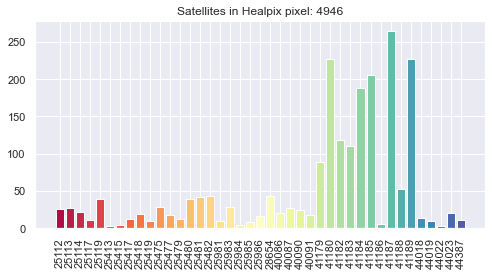

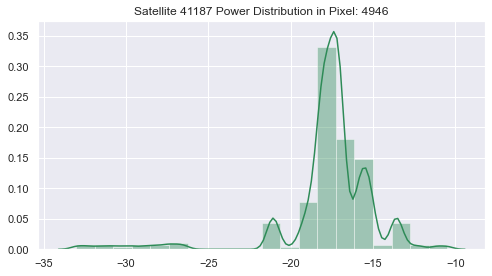

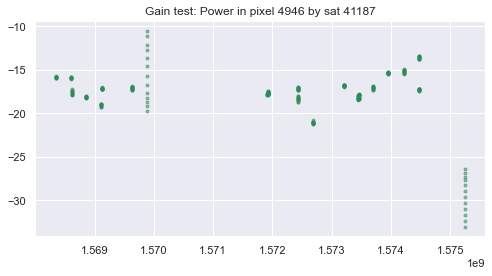

Number of passes in pixel 5218: 2010, Median: -13.40086555480957, MAD: 1.4109115528106688


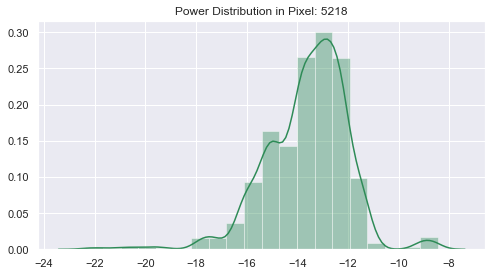

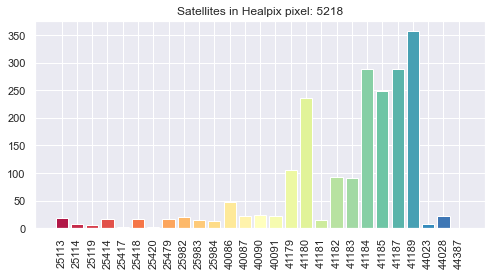

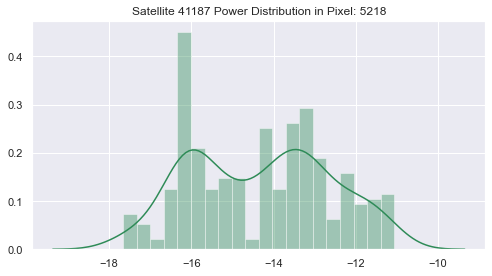

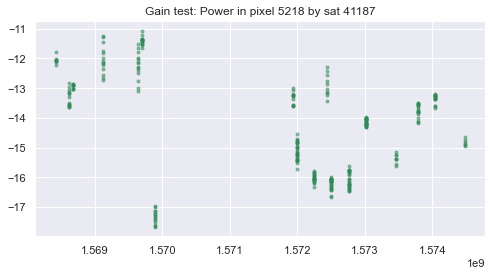

Number of passes in pixel 5336: 2070, Median: -15.557380676269531, MAD: 1.780540704345703


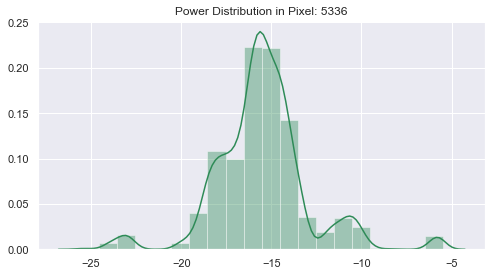

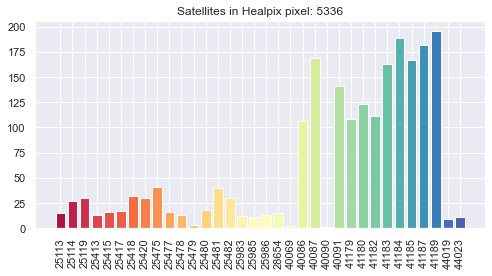

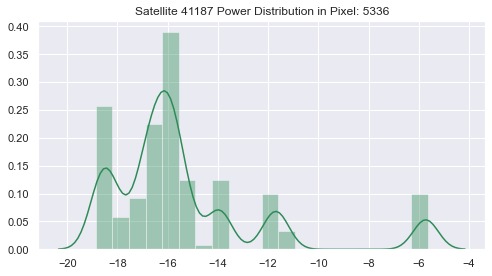

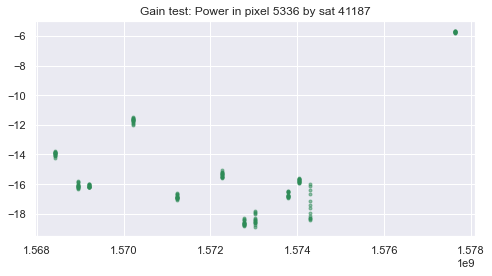

Number of passes in pixel 5445: 2337, Median: -15.06155776977539, MAD: 1.7564927947998046


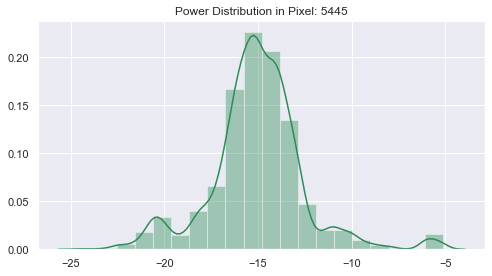

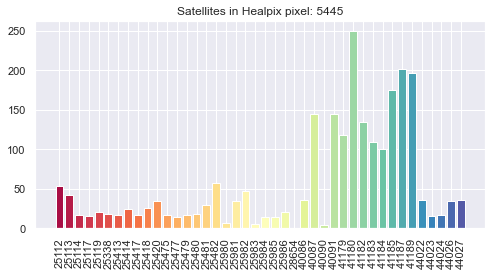

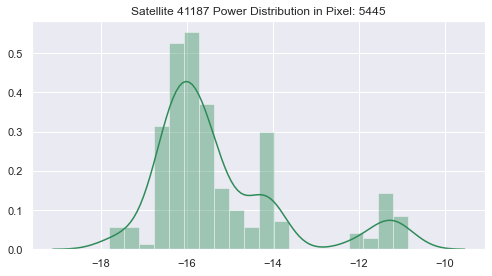

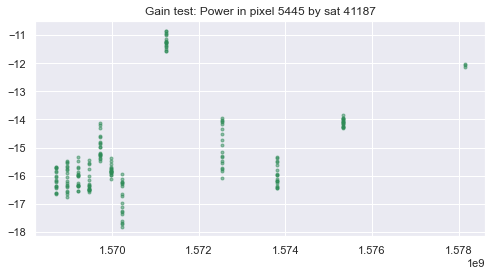

Number of passes in pixel 5572: 2344, Median: -14.447589874267578, MAD: 1.3093611671447754


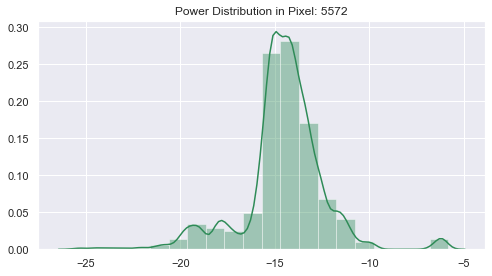

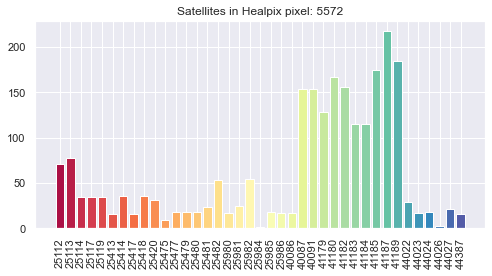

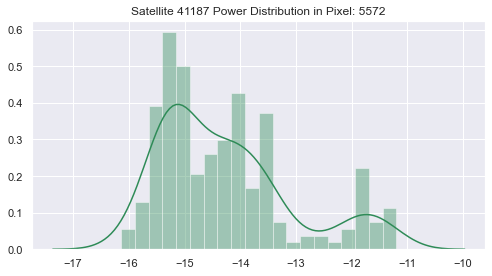

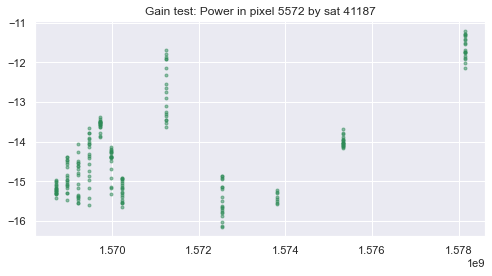

Number of passes in pixel 5727: 2127, Median: -13.948993682861328, MAD: 1.0093448318481444


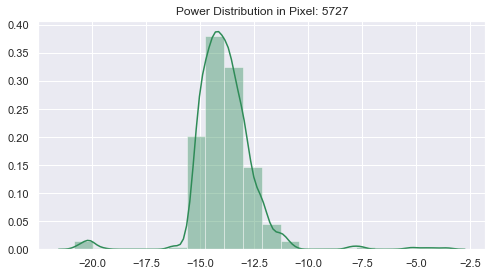

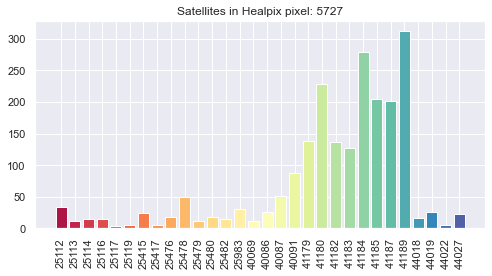

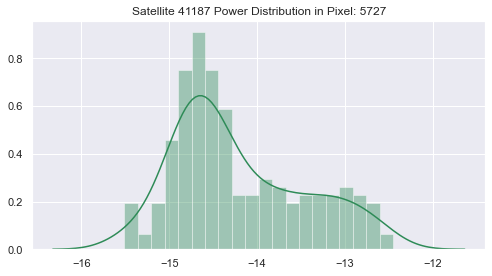

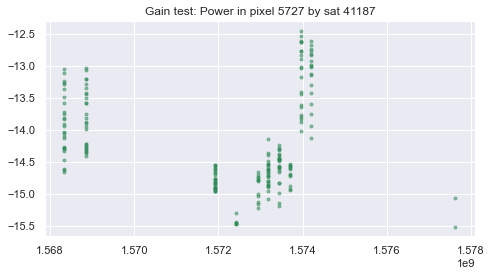

In [11]:
for i in pix_list[0]:
    plt_pix_data(i)